## Classification
### 1. Currency exchange topic

### Load

Tokens

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
tokens_izq = pd.read_pickle('tokens/topic_tokens_izq_new.pkl')
tokens_der = pd.read_pickle('tokens/topic_tokens_der_new.pkl')

In [4]:
tokens_izq_ex = tokens_izq[tokens_izq.topics == 'exchange'].drop('topics', axis=1)
tokens_izq_ex.insert(loc=0, column='publication', value='left')

In [5]:
tokens_der_ex = tokens_der[tokens_der.topics == 'exchange'].drop('topics', axis=1)
tokens_der_ex.insert(loc=0, column='publication', value='right')

In [6]:
tokens = tokens_izq_ex.append(tokens_der_ex)
tokens.reset_index(inplace=True)
tokens.drop('index', axis=1, inplace=True)
tokens.fillna(0, inplace=True)

In [7]:
tokens.shape

(56, 7078)

#### Train - Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# data balance
tokens.publication.value_counts(normalize=True)

right    0.535714
left     0.464286
Name: publication, dtype: float64

In [10]:
X = tokens.drop('publication', axis=1)

In [11]:
y = tokens['publication']

In [12]:
train, test, y_train, y_test = train_test_split(X, y, train_size=0.75, stratify=tokens.publication)

Shapes and balance

In [13]:
# shape train
display(train.shape[0],
        train.shape[0] / X.shape[0])

42

0.75

In [14]:
# shape test
display(test.shape[0],
        test.shape[0] / X.shape[0])

14

0.25

In [15]:
# data balance - test
display(y_train.value_counts(normalize=True), 
        y_test.value_counts(normalize=True))

right    0.52381
left     0.47619
Name: publication, dtype: float64

right    0.571429
left     0.428571
Name: publication, dtype: float64

Vectorización con TF-IDF

In [16]:
from sklearn.feature_extraction.text import TfidfTransformer

In [17]:
tfidf_vector = TfidfTransformer().fit(train)
train_tfidf = tfidf_vector.transform(train)

In [18]:
test_tfidf = tfidf_vector.transform(test)

#### Models calling

In [19]:
from sklearn.naive_bayes import MultinomialNB

#### K-Folds

In [20]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
folds = StratifiedKFold(n_splits=5, random_state=19, shuffle=True)

#### Classification

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
parameters = {
        'alpha': (1e-2, 1e-3, 1e-1),
    }

In [25]:
grid_mnb = GridSearchCV(MultinomialNB(), parameters, cv=folds, scoring='accuracy')

In [26]:
grid_mnb.fit(train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=19, shuffle=True),
             estimator=MultinomialNB(),
             param_grid={'alpha': (0.01, 0.001, 0.1)}, scoring='accuracy')

In [27]:
grid_pred = grid_mnb.predict(test)

#### Results

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
matrix = confusion_matrix(y_test, grid_pred)
accuracy_score(y_test, grid_pred)

1.0

In [31]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

        left       1.00      1.00      1.00         6
       right       1.00      1.00      1.00         8

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



In [32]:
results = pd.DataFrame({'actual': y_test, 'pred': grid_pred, 'acc': y_test == grid_pred})
results[results.acc == False]

,actual,pred,acc


In [33]:
display(results.actual.value_counts(), results.pred.value_counts())

right    8
left     6
Name: actual, dtype: int64

right    8
left     6
Name: pred, dtype: int64

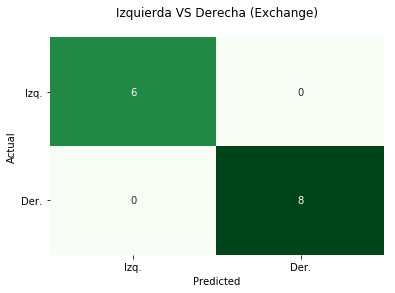

In [34]:
sns.heatmap(confusion_matrix(y_test, grid_pred), annot=True, cbar=False, cmap="Greens")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5],['Izq.','Der.'])
plt.yticks([0.5, 1.5],['Izq.','Der.'], rotation = 0.5)
plt.title('Izquierda VS Derecha (Exchange)\n', loc='center')
plt.show()

<hr>

### 2. Inflation topic

In [35]:
tokens_izq_inf = tokens_izq[tokens_izq.topics == 'inflation'].drop('topics', axis=1)
tokens_izq_inf.insert(loc=0, column='publication', value='left')

In [36]:
tokens_der_inf = tokens_der[tokens_der.topics == 'inflation'].drop('topics', axis=1)
tokens_der_inf.insert(loc=0, column='publication', value='right')

In [37]:
tokens = tokens_izq_inf.append(tokens_der_inf)
tokens.reset_index(inplace=True)
tokens.drop('index', axis=1, inplace=True)
tokens.fillna(0, inplace=True)

In [38]:
tokens.shape

(81, 7078)

#### Train-Test Split

In [39]:
X = tokens.drop('publication', axis=1)

In [40]:
y = tokens['publication']

In [41]:
train, test, y_train, y_test = train_test_split(X, y, train_size=0.75, stratify=tokens.publication)

Shapes and balance

In [42]:
# shape train
display(train.shape[0],
        train.shape[0] / X.shape[0])

60

0.7407407407407407

In [43]:
# shape test
display(test.shape[0],
        test.shape[0] / X.shape[0])

21

0.25925925925925924

In [44]:
# data balance - test
display(y_train.value_counts(normalize=True), 
        y_test.value_counts(normalize=True))

right    0.516667
left     0.483333
Name: publication, dtype: float64

right    0.52381
left     0.47619
Name: publication, dtype: float64

Vectorización con TF-IDF

In [45]:
from sklearn.feature_extraction.text import TfidfTransformer

In [46]:
tfidf_vector = TfidfTransformer().fit(train)
train_tfidf = tfidf_vector.transform(train)

In [47]:
test_tfidf = tfidf_vector.transform(test)

#### Classification

In [48]:
grid_mnb.fit(train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=19, shuffle=True),
             estimator=MultinomialNB(),
             param_grid={'alpha': (0.01, 0.001, 0.1)}, scoring='accuracy')

In [49]:
grid_pred = grid_mnb.predict(test)

#### Results

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
matrix = confusion_matrix(y_test, grid_pred)
accuracy_score(y_test, grid_pred)

1.0

In [53]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

        left       1.00      1.00      1.00        10
       right       1.00      1.00      1.00        11

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [54]:
results = pd.DataFrame({'actual': y_test, 'pred': grid_pred, 'acc': y_test == grid_pred})
results[results.acc == False]

,actual,pred,acc


In [55]:
display(results.actual.value_counts(), results.pred.value_counts())

right    11
left     10
Name: actual, dtype: int64

right    11
left     10
Name: pred, dtype: int64

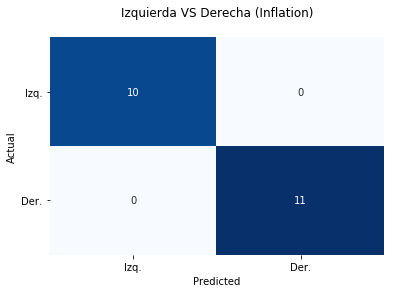

In [56]:
sns.heatmap(confusion_matrix(y_test, grid_pred), annot=True, cbar=False, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5],['Izq.','Der.'])
plt.yticks([0.5, 1.5],['Izq.','Der.'], rotation = 0.5)
plt.title('Izquierda VS Derecha (Inflation)\n', loc='center')
plt.show()

<hr>


### 3. All topics

In [57]:
tokens_izq = tokens_izq.drop('topics', axis=1)
tokens_izq.insert(loc=0, column='publication', value='left')

In [58]:
tokens_der = tokens_der.drop('topics', axis=1)
tokens_der.insert(loc=0, column='publication', value='right')

In [59]:
tokens = tokens_izq.append(tokens_der)
tokens.reset_index(inplace=True)
tokens.drop('index', axis=1, inplace=True)
tokens.fillna(0, inplace=True)

In [60]:
tokens.shape

(137, 7078)

#### Train-Test Split

In [61]:
X = tokens.drop('publication', axis=1)

In [62]:
y = tokens['publication']

In [63]:
train, test, y_train, y_test = train_test_split(X, y, train_size=0.75, stratify=tokens.publication)

Shapes and balance

In [64]:
# shape train
display(train.shape[0],
        train.shape[0] / X.shape[0])

102

0.7445255474452555

In [65]:
# shape test
display(test.shape[0],
        test.shape[0] / X.shape[0])

35

0.25547445255474455

In [66]:
# data balance - test
display(y_train.value_counts(normalize=True), 
        y_test.value_counts(normalize=True))

right    0.529412
left     0.470588
Name: publication, dtype: float64

right    0.514286
left     0.485714
Name: publication, dtype: float64

Vectorización con TF-IDF

In [67]:
from sklearn.feature_extraction.text import TfidfTransformer

In [68]:
tfidf_vector = TfidfTransformer().fit(train)
train_tfidf = tfidf_vector.transform(train)

In [69]:
test_tfidf = tfidf_vector.transform(test)

#### Classification

In [70]:
grid_mnb.fit(train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=19, shuffle=True),
             estimator=MultinomialNB(),
             param_grid={'alpha': (0.01, 0.001, 0.1)}, scoring='accuracy')

In [71]:
grid_pred = grid_mnb.predict(test)

#### Results

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
from sklearn.metrics import classification_report, confusion_matrix

In [74]:
matrix = confusion_matrix(y_test, grid_pred)
accuracy_score(y_test, grid_pred)

0.9714285714285714

In [75]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

        left       1.00      0.94      0.97        17
       right       0.95      1.00      0.97        18

    accuracy                           0.97        35
   macro avg       0.97      0.97      0.97        35
weighted avg       0.97      0.97      0.97        35



In [76]:
results = pd.DataFrame({'actual': y_test, 'pred': grid_pred, 'acc': y_test == grid_pred})
results[results.acc == False]

,actual,pred,acc
60,left,right,False


In [77]:
results.actual.value_counts(), results.pred.value_counts()

(right    18
 left     17
 Name: actual, dtype: int64,
 right    19
 left     16
 Name: pred, dtype: int64)

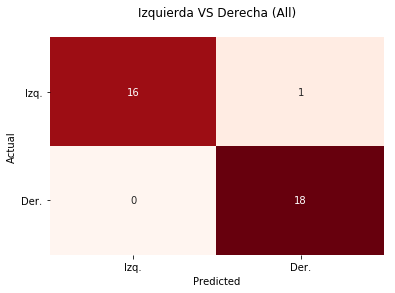

In [78]:
sns.heatmap(confusion_matrix(y_test, grid_pred), annot=True, cbar=False, cmap="Reds")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5],['Izq.','Der.'])
plt.yticks([0.5, 1.5],['Izq.','Der.'], rotation = 0.5)
plt.title('Izquierda VS Derecha (All)\n', loc='center')
plt.show()